### Transfer learning

<img src="Grafika/TransferLearning_1.png" width="600">
Źródło: https://medium.com/@14prakash/transfer-learning-using-keras-d804b2e04ef8

<br>

<br>


<br>


<img src="Grafika/TransferLearning_2.png" width="600">
Źródło: https://medium.com/decathlondevelopers/how-you-can-build-an-image-classifier-in-one-day-part-1-transfer-learning-5602d3f96e6b

Dane: https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [1]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np


In [2]:
from tensorflow.keras.applications.vgg19 import VGG19

h,w = 150, 150
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(h,w,3))

80134624/80134624 [==============================] - 3s 0us/step


In [3]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [5]:
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(128, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

In [6]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(top_model)

In [7]:
transfer_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 sequential (Sequential)     (None, 1)                 1048833   
                                                                 
Total params: 21,073,217
Trainable params: 21,073,217
Non-trainable params: 0
_________________________________________________________________


In [8]:
transfer_model.layers[0].trainable = False

In [13]:
transfer_model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [11]:
transfer_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 sequential (Sequential)     (None, 1)                 1048833   
                                                                 
Total params: 21,073,217
Trainable params: 1,048,833
Non-trainable params: 20,024,384
_________________________________________________________________


In [14]:
transfer_model.fit(...)

ValueError: Failed to find data adapter that can handle input: <class 'ellipsis'>, <class 'NoneType'>

### Augmentacja obrazów

<img src="https://www.kdnuggets.com/wp-content/uploads/cats-data-augmentation.jpg" width="400">
Źródło: https://nanonets.com/blog/content/images/2018/11/1_C8hNiOqur4OJyEZmC7OnzQ.png

### Czytanie obrazów z dysku

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import preprocess_input

In [17]:
# dimensions of our images.
img_width, img_height = 100, 100
batch_size = 16

train_data_dir = 'Dane/cats_and_dogs_data/train/'
valid_data_dir = 'Dane/cats_and_dogs_data/validation/'

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_flow = train_datagen.flow_from_directory(train_data_dir,
                                               target_size=(h, w),
                                               batch_size=batch_size,
                                               class_mode="binary")
valid_flow = valid_datagen.flow_from_directory(valid_data_dir,
                                               target_size=(h, w),
                                               batch_size=batch_size,
                                               class_mode="binary")

transfer_model.compile(loss="binary_crossentropy", 
                       optimizer="adam",
                       metrics=["accuracy"])

transfer_model.fit(train_flow,  
          validation_data=valid_flow,
          epochs=2)

Found 1607 images belonging to 2 classes.
Found 363 images belonging to 2 classes.
Epoch 1/2
101/101 [==============================] - 74s 722ms/step - loss: 2.4616 - accuracy: 0.9042 - val_loss: 0.8743 - val_accuracy: 0.9587
Epoch 2/2
101/101 [==============================] - 76s 757ms/step - loss: 0.7904 - accuracy: 0.9564 - val_loss: 1.1616 - val_accuracy: 0.9449


In [38]:
import matplotlib.pyplot as plt
img = train_flow.next()
img

(array([[[[  10.060997  ,   22.221     ,   17.32      ],
          [  10.060997  ,   20.221     ,   15.32      ],
          [  10.060997  ,   20.221     ,   15.32      ],
          ...,
          [ -48.939003  ,   -3.7789993 ,   24.32      ],
          [ -53.939003  ,  -12.778999  ,   11.32      ],
          [ -63.939003  ,  -29.779     ,   -9.68      ]],
 
         [[   9.060997  ,   21.221     ,   16.32      ],
          [   8.060997  ,   18.221     ,   13.32      ],
          [   9.060997  ,   19.221     ,   14.32      ],
          ...,
          [ -47.939003  ,    0.22100067,   25.32      ],
          [ -62.939003  ,  -20.779     ,   -0.6800003 ],
          [ -64.939     ,  -29.779     ,  -12.68      ]],
 
         [[   2.060997  ,   14.221001  ,    9.32      ],
          [  10.060997  ,   20.221     ,   15.32      ],
          [  12.060997  ,   22.221     ,   17.32      ],
          ...,
          [ -62.939003  ,  -13.778999  ,   19.32      ],
          [ -62.939003  ,  -21.779   

In [39]:
len(img)

2

In [45]:
img[1]

array([0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.],
      dtype=float32)

In [46]:
img[0]

array([[[[  10.060997  ,   22.221     ,   17.32      ],
         [  10.060997  ,   20.221     ,   15.32      ],
         [  10.060997  ,   20.221     ,   15.32      ],
         ...,
         [ -48.939003  ,   -3.7789993 ,   24.32      ],
         [ -53.939003  ,  -12.778999  ,   11.32      ],
         [ -63.939003  ,  -29.779     ,   -9.68      ]],

        [[   9.060997  ,   21.221     ,   16.32      ],
         [   8.060997  ,   18.221     ,   13.32      ],
         [   9.060997  ,   19.221     ,   14.32      ],
         ...,
         [ -47.939003  ,    0.22100067,   25.32      ],
         [ -62.939003  ,  -20.779     ,   -0.6800003 ],
         [ -64.939     ,  -29.779     ,  -12.68      ]],

        [[   2.060997  ,   14.221001  ,    9.32      ],
         [  10.060997  ,   20.221     ,   15.32      ],
         [  12.060997  ,   22.221     ,   17.32      ],
         ...,
         [ -62.939003  ,  -13.778999  ,   19.32      ],
         [ -62.939003  ,  -21.779     ,    1.3199997 ],
  

In [40]:
img[0].shape

(16, 150, 150, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


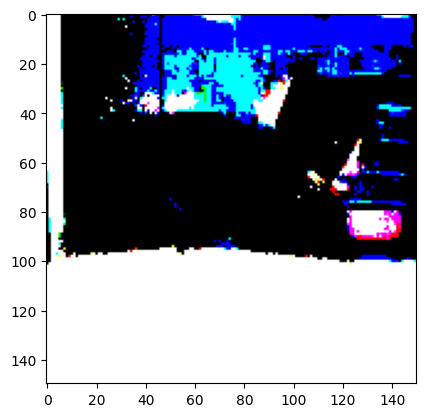

In [41]:
plt.imshow(img[0][0])

### Augmentacja obrazów

In [ ]:
?ImageDataGenerator

In [47]:
# dimensions of our images.
img_width, img_height = 100, 100

train_data_dir = 'Dane/cats_and_dogs_data/train/'
valid_data_dir = 'Dane/cats_and_dogs_data//validation/'
batch_size = 16


# prepare data augmentation configuration
train_datagen = ImageDataGenerator(shear_range=0.2, 
                                   zoom_range=0.2,
                                   rotation_range=30, 
                                   horizontal_flip=True,
                                   preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_flow = train_datagen.flow_from_directory(train_data_dir,
                                               target_size=(h, w),
                                               batch_size=batch_size,
                                               class_mode="binary")
valid_flow = valid_datagen.flow_from_directory(valid_data_dir,
                                               target_size=(h, w),
                                               batch_size=batch_size,
                                               class_mode="binary")

transfer_model.compile(loss="binary_crossentropy", 
                       optimizer="adam",
                       metrics=["accuracy"])

transfer_model.fit(train_flow,  
          validation_data=valid_flow,
          epochs=2)

Found 1607 images belonging to 2 classes.
Found 363 images belonging to 2 classes.
Epoch 1/2
 51/101 [==============>...............] - ETA: 29s - loss: 0.9368 - accuracy: 0.9436